In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv("../dataset/salary_data.csv")

In [5]:
data.head()

,YearsExperience,Salary($)
0,1.1,39343
1,1.2,42500
2,1.3,46205
3,1.4,37731
4,1.5,43525


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  100 non-null    float64
 1   Salary($)        100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [10]:
X = data[['YearsExperience']]
y = data['Salary($)']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Slope (m): 11113.504856336816
Intercept (b): 22770.370169697737


In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print("Mean Squred Error: ", mse)
print("R2 Score:", r2)

Mean Squred Error:  42230108.434558146
R2 Score: 0.9601315013188465


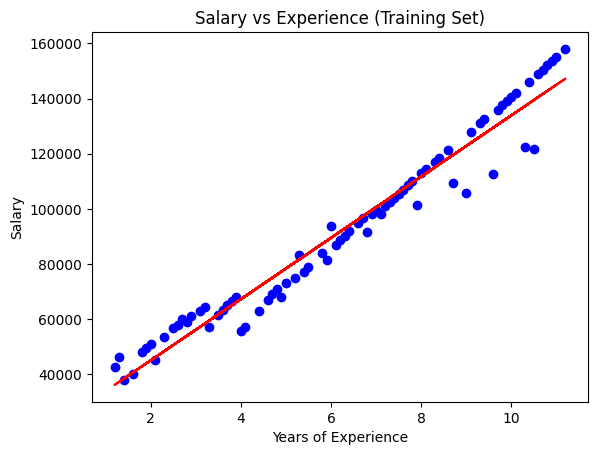

In [17]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, model.predict(X_train), color="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience (Training Set)")
plt.show()

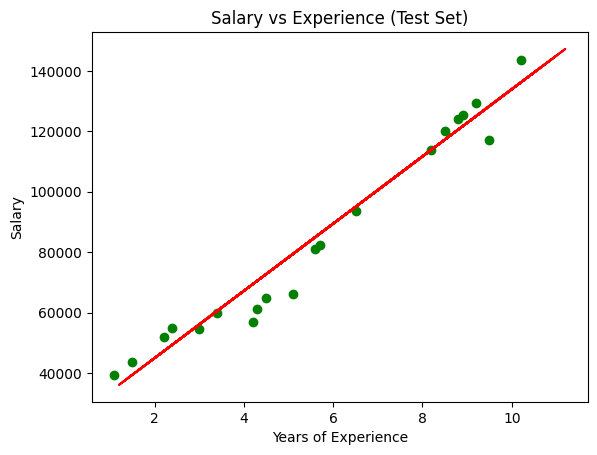

In [18]:
plt.scatter(X_test, y_test, color="green")
plt.plot(X_train, model.predict(X_train), color="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience (Test Set)")
plt.show()

## Submission

In [19]:
with open("model_performance.txt", "w") as f:
    f.write("Model Performance Metrics\n")
    f.write("-------------------------\n")
    f.write(f"Mean Squred Error (MSE): {mse:.2f}\n")
    f.write(f"R2 Score: {r2:.4f}\n")
print("Model performance metrics saved to model_performance.txt")

Model performance metrics saved to model_performance.txt


In [21]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")

# Perfect prediction line
min_salary = min(y_test)
max_salary = max(y_test)
plt.plot([min_salary, max_salary], [min_salary, max_salary])

plt.savefig("actual_vs_pred.png")
plt.close()

print("Visualization saved as actual_vs_pred.png")

Visualization saved as actual_vs_pred.png
